In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Read cleaned data
df = pd.read_csv('salary_data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Company Name,Rating,Location,Size,Founded,Type of ownership,Industry,...,min_salary,max_salary,avg_salary,age,power_bi_yn,tableau_yn,python_yn,sql_yn,excel_yn,machine_learning_yn
0,Data Analyst,MYR 25K - MYR 91K (Employer est.),Your work makes the difference between a user ...,Citymapper,-1.0,Kuala Lumpur,-1,-1,-1,-1,...,25,91,58.0,-1,0,0,0,0,0,0
1,DATA ANALYST,MYR 42K - MYR 60K (Employer est.),Basic Background & Requirement:\nBachelor in A...,MyFundAction,-1.0,Shah Alam,-1,-1,-1,-1,...,42,60,51.0,-1,0,0,0,0,0,0
2,Industry Analyst,MYR 48K - MYR 65K (Employer est.),This is a permanent work-from-home position.\n...,ENF Solar Ltd.,-1.0,Kuala Lumpur,-1,-1,-1,-1,...,48,65,56.5,-1,0,0,0,0,0,0
3,Data Migration Analyst,MYR 96K (Employer est.),Requirements\n· Must be Malaysian\nJob Descrip...,AMK Technology Sdn Bhd,4.2,Kuala Lumpur,201 to 500 Employees,2002,Company - Private,IT Services,...,96,96,96.0,18,0,0,0,0,0,0
4,Junior Data Analyst (Recent Graduate May be Co...,MYR 25K - MYR 38K (Employer est.),Junior Data Scientist\nPM101 Consulting Kuala ...,PM101 Consulting,-1.0,Kuala Lumpur,-1,-1,-1,-1,...,25,38,31.5,-1,0,0,0,0,0,0


In [3]:
# Clearn job title
# Make all job title lower case
df['job_simp'] = df['Job Title'].str.lower()
# Split job title into common titles
# Perform multiple split
df['job_simp'] = df['job_simp'].apply(lambda x: x.split('(')[0])
df['job_simp'] = df['job_simp'].apply(lambda x: x.split('-')[0])
df['job_simp'] = df['job_simp'].apply(lambda x: x.split('/')[0])
df['job_simp'] = df['job_simp'].apply(lambda x: x.split(',')[0])
df['job_simp'] = df['job_simp'].apply(lambda x: x.split('&')[0])


In [4]:
# Create new job Description length column
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [5]:
# Converting hourly wage to annual wage by multiply 2 divide 1000
df['min_salary'] = df.apply(lambda x: x['min_salary']*2 if x['salary_estimate_hourly'] ==1 else x['min_salary'],axis=1 )
df['max_salary'] = df.apply(lambda x: x['max_salary']*2 if x['salary_estimate_hourly'] ==1 else x['max_salary'],axis=1 )

In [6]:
# Check the min and max salary column
df[df['salary_estimate_hourly']==1][['salary_estimate_hourly','min_salary','max_salary']]

,salary_estimate_hourly,min_salary,max_salary
5,1,72,84
53,1,72,84
63,1,72,84
81,1,72,84
100,1,72,84
118,1,72,84
139,1,72,84
160,1,72,84
181,1,72,84
200,1,72,84


In [7]:
# Get some intiution about the data segregation
df.describe()

,Rating,Founded,salary_estimate_hourly,min_salary,max_salary,avg_salary,age,power_bi_yn,tableau_yn,python_yn,sql_yn,excel_yn,machine_learning_yn,desc_len
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,0.555187,412.493776,0.049793,46.622407,62.294606,52.516598,5.008299,0.070539,0.132780,0.004149,0.170124,0.232365,0.029046,1269.651452
std,2.261246,810.036564,0.217969,21.645692,25.069244,21.549114,21.066362,0.256587,0.340043,0.064416,0.376524,0.423220,0.168284,1145.780874
min,-1.000000,-1.000000,0.000000,10.000000,13.000000,11.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,306.000000
25%,-1.000000,-1.000000,0.000000,30.000000,42.000000,39.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,577.000000
50%,-1.000000,-1.000000,0.000000,42.000000,54.000000,45.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,783.000000
75%,3.500000,-1.000000,0.000000,66.000000,91.000000,66.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1520.000000
max,4.200000,2018.000000,1.000000,96.000000,132.000000,102.000000,153.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4601.000000


<AxesSubplot:>

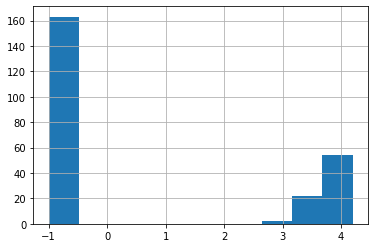

In [8]:
# Plot histogram to understand the data distribution
df['Rating'].hist()

<AxesSubplot:>

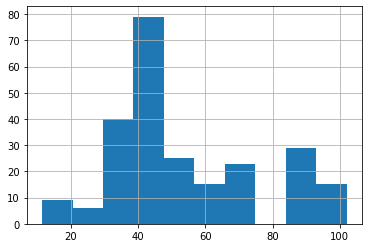

In [9]:
df['avg_salary'].hist()

<AxesSubplot:>

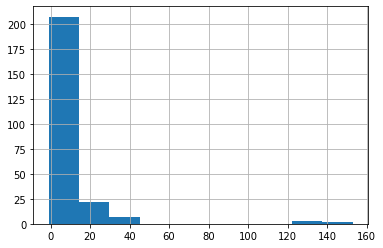

In [10]:
df['age'].hist()

<AxesSubplot:>

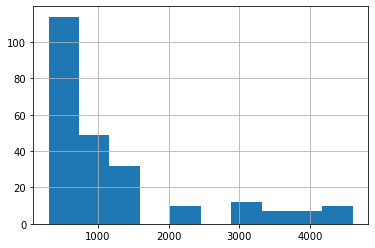

In [11]:
df['desc_len'].hist()

<AxesSubplot:>

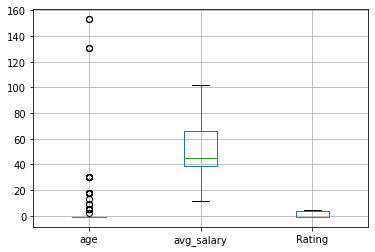

In [12]:
# Plot boxplot to know any outliners and etc
df.boxplot(column = ['age','avg_salary','Rating'])

<AxesSubplot:>

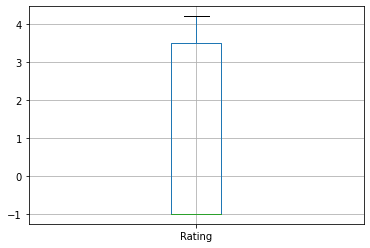

In [13]:
df.boxplot(column = 'Rating')

<AxesSubplot:>

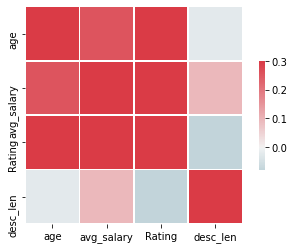

In [14]:
# Check continous variable
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [15]:
# Understand the relation of categorical variable by plotting bar chart
df_categorical = df[['Location', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'power_bi_yn', 'tableau_yn',
       'python_yn', 'sql_yn', 'excel_yn', 'machine_learning_yn', 'job_simp']]

graph for Location: total = 10


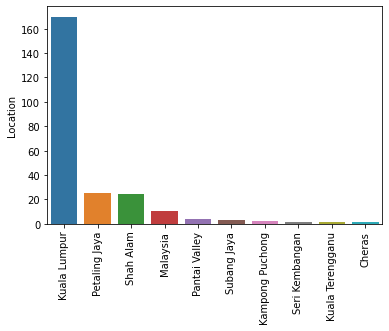

graph for Size: total = 8


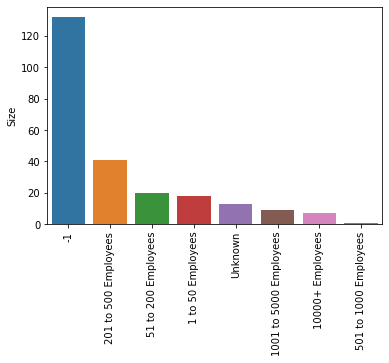

graph for Type of ownership: total = 4


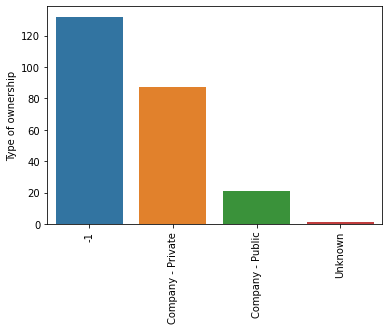

graph for Industry: total = 9


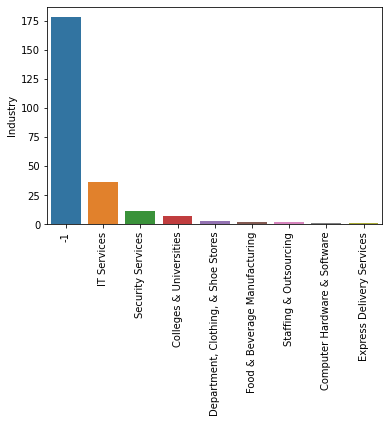

graph for Sector: total = 7


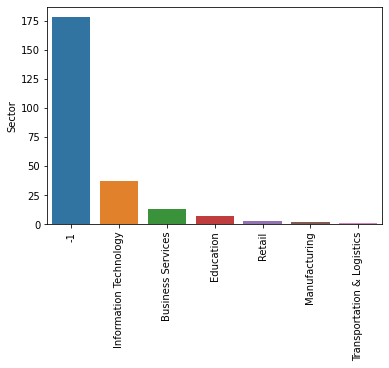

graph for Revenue: total = 7


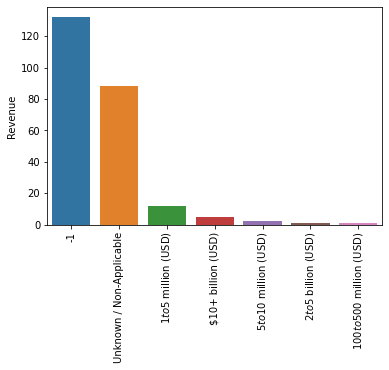

graph for power_bi_yn: total = 2


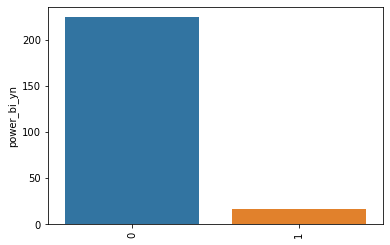

graph for tableau_yn: total = 2


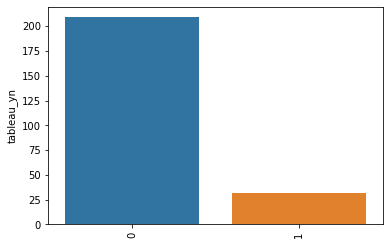

graph for python_yn: total = 2


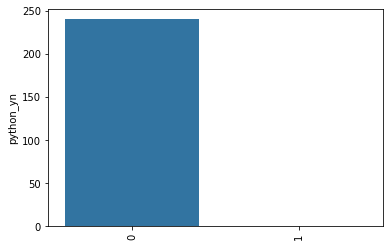

graph for sql_yn: total = 2


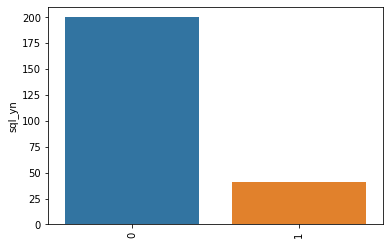

graph for excel_yn: total = 2


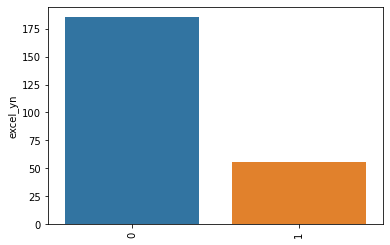

graph for machine_learning_yn: total = 2


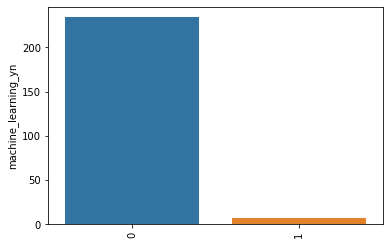

graph for job_simp: total = 24


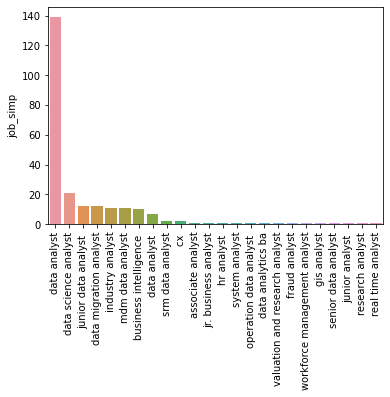

In [16]:
for i in df_categorical.columns:
    cat_num = df_categorical[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 10


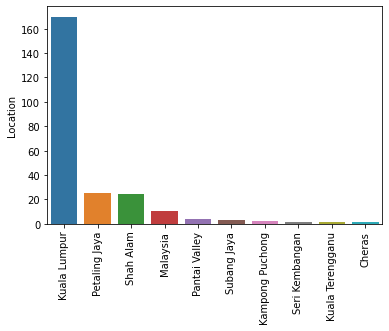

In [17]:
# Understand the location categorical variable impacting the job hiring
for i in df_categorical[['Location']].columns:
    cat_num = df_categorical[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [18]:
# From the pivot table, data migration analyst has highest average salary
pd.pivot_table(df, index= 'job_simp', values='avg_salary')

,avg_salary
job_simp,
associate analyst,33.000000
business intelligence,84.000000
cx,66.000000
data analyst,49.841727
data analyst,84.000000
data analytics ba,96.000000
data migration analyst,96.000000
data science analyst,40.285714
fraud analyst,45.000000


In [19]:
# From the pivot table, Petaling Jaya location has highest average salary
pd.pivot_table(df, index= 'Location', values='avg_salary')

,avg_salary
Location,
Cheras,45.000000
Kampong Puchong,49.500000
Kuala Lumpur,54.032353
Kuala Terengganu,24.000000
Malaysia,43.800000
Pantai Valley,53.750000
Petaling Jaya,55.960000
Seri Kembangan,27.000000
Shah Alam,48.000000


In [20]:
# From here we can know Kuala Lumpur hiring the highest job roles numbers
pd.pivot_table(df, index = ['Location','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('Location', ascending = False)

avg_salary
Location         job_simp                                  
Subang Jaya      data analyst                             3
Shah Alam        data analyst                            24
Seri Kembangan   gis analyst                              1
Petaling Jaya    jr. business analyst                     1
                 data science analyst                    12
                 data analyst                             2
                 business intelligence                   10
Pantai Valley    system analyst                           1
                 data analyst                             3
Malaysia         real time analyst                        1
                 data analyst                             7
                 cx                                       2
Kuala Terengganu junior analyst                           1
Kuala Lumpur     workforce management analyst             1
                 valuation and research analyst           1
                 srm data analyst                         2
                 senior data analyst                      1
                 mdm data analyst                        11
                 junior data analyst                     12
                 industry analyst                        11
                 hr analyst                               1
                 fraud analyst                            1
                 data science analyst                     9
                 data migration analyst                  12
                 data analytics ba                        1
                 data analyst                             7
                 data analyst                           100
Kampong Puchong  associate analyst                        1
                 operation data analyst                   1
Cheras           research analyst                         1

In [21]:
# Sort average salary by location
# Found out Pantai Valley has highest salary
pd.pivot_table(df[df.job_simp == 'data analyst'], index = 'Location', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
Location,
Pantai Valley,59.00
Kuala Lumpur,52.18
Shah Alam,48.00
Malaysia,36.00
Petaling Jaya,28.50
Subang Jaya,24.00


In [22]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Company Name',
       'Rating', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'salary_estimate_split',
       'salary_estimate_hourly', 'min_salary', 'max_salary', 'avg_salary',
       'age', 'power_bi_yn', 'tableau_yn', 'python_yn', 'sql_yn', 'excel_yn',
       'machine_learning_yn', 'job_simp', 'desc_len'],
      dtype='object')

In [23]:
# Creating pivot table based on variables below
# rating, location, industry, sector, revenue, salary_estimate_hourly, power_bi_yn, 
# tableau_yn, python_yn, sql_yn, excel_yn, machine_learning_yn, desc_len, job_simp, type of ownership,

In [24]:
df_pivots = df[['Rating', 'Location', 'Industry', 'Sector', 'Revenue', 'salary_estimate_hourly', 'power_bi_yn',
'tableau_yn', 'python_yn', 'sql_yn', 'excel_yn', 'machine_learning_yn', 'desc_len', 'job_simp', 'Type of ownership', 'avg_salary']]

In [25]:
for i in df_pivots.columns[:-1]:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 3.5     85.692308
 3.9     84.000000
 4.2     82.363636
 4.1     47.428571
-1.0     46.987730
 3.6     45.500000
 3.4     40.875000
 3.7     39.666667
 2.7     38.000000
 2.8     27.000000
Location
                  avg_salary
Location                    
Petaling Jaya      55.960000
Kuala Lumpur       54.032353
Pantai Valley      53.750000
Kampong Puchong    49.500000
Shah Alam          48.000000
Cheras             45.000000
Malaysia           43.800000
Seri Kembangan     27.000000
Kuala Terengganu   24.000000
Subang Jaya        24.000000
Industry
                                     avg_salary
Industry                                       
Colleges & Universities               84.000000
IT Services                           80.972222
Staffing & Outsourcing                70.750000
Food & Beverage Manufacturing         66.000000
Department, Clothing, & Shoe Stores   59.000000
-1                                    45.932584
Security Servic

In [26]:
!pip install wordcloud
!pip install nltk

In [27]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Darknman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

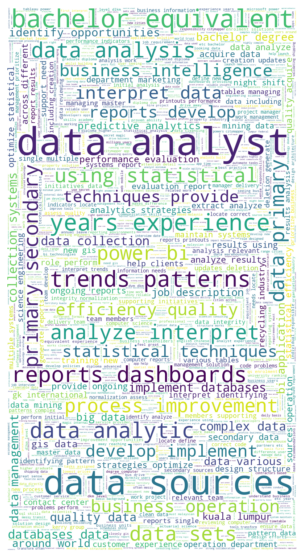

In [28]:
# Use wordcloud to visualize the data
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()